In [16]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("D:\\D\\DEPI\\diabetic_data.csv")
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
df.replace("?", np.nan, inplace=True)

# Drop irrelevant identifiers
df.drop(["encounter_id", "patient_nbr"], axis=1, inplace=True)

# Create binary target column
df["target"] = df["readmitted"].apply(lambda x: 1 if x == "<30" else 0)
df.drop("readmitted", axis=1, inplace=True)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [18]:
# Drop columns with too many missing values or low relevance
drop_cols = ["weight", "payer_code", "medical_specialty", "race"]
df.drop(columns=drop_cols, inplace=True)

# Fill remaining missing values with 'Unknown' for categorical columns
df.fillna("Unknown", inplace=True)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all categorical features
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if needed later


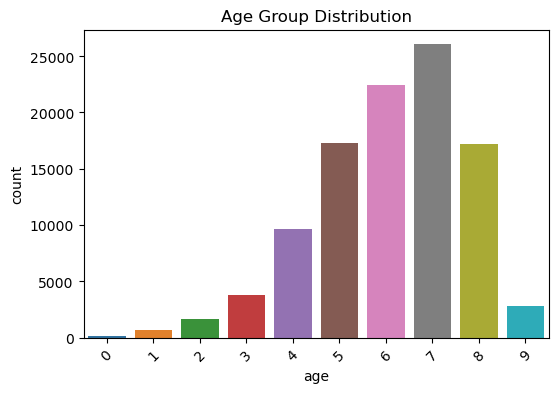

In [23]:
# Age distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='age', data=df)
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

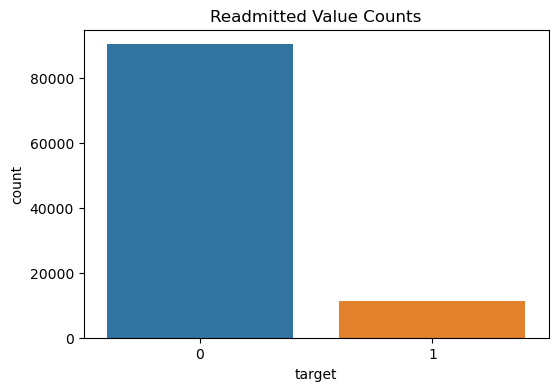

In [26]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Readmitted Value Counts')
plt.show()

In [33]:
# Display the final shape and first few rows
print(df.shape)
df.info()

(101766, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   gender                    101766 non-null  int32
 1   age                       101766 non-null  int32
 2   admission_type_id         101766 non-null  int64
 3   discharge_disposition_id  101766 non-null  int64
 4   admission_source_id       101766 non-null  int64
 5   time_in_hospital          101766 non-null  int64
 6   num_lab_procedures        101766 non-null  int64
 7   num_procedures            101766 non-null  int64
 8   num_medications           101766 non-null  int64
 9   number_outpatient         101766 non-null  int64
 10  number_emergency          101766 non-null  int64
 11  number_inpatient          101766 non-null  int64
 12  diag_1                    101766 non-null  int32
 13  diag_2                    101766 non-null  int32
 14  diag_3 

In [34]:
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target
0,0,0,6,25,1,1,41,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1,0,1,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,0,1,0
2,0,2,1,1,7,2,11,5,13,2,...,0,1,1,0,0,0,0,1,1,0
3,1,3,1,1,7,2,44,1,16,0,...,0,3,1,0,0,0,0,0,1,0
4,1,4,1,1,7,1,51,0,8,0,...,0,2,1,0,0,0,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.801955389604009
Confusion Matrix:
 [[15872  2211]
 [ 1820   451]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     18083
           1       0.17      0.20      0.18      2271

    accuracy                           0.80     20354
   macro avg       0.53      0.54      0.54     20354
weighted avg       0.82      0.80      0.81     20354



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Limited configuration to reduce memory usage
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8884248796305394
Confusion Matrix:
 [[18083     0]
 [ 2271     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.00      0.00      0.00      2271

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.84     20354



C:\Users\Amr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Accuracy comparison
dt_acc = accuracy_score(y_test, y_pred_dt)
# rf_acc = accuracy_score(y_test, y_pred_rf)  # Uncomment if RF runs

print(f"Decision Tree Accuracy: {dt_acc}")
# print(f"Random Forest Accuracy: {rf_acc}")  # Uncomment if RF runs

# You may comment on overfitting, bias-variance, and interpretability in the report.


Decision Tree Accuracy: 0.801955389604009


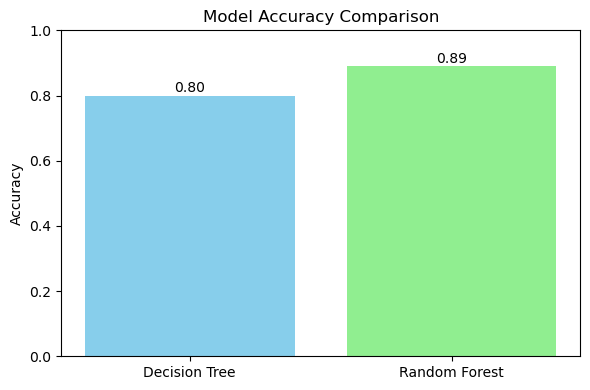

In [32]:
import matplotlib.pyplot as plt

dt_accuracy = 0.80 
rf_accuracy = 0.89  

model_names = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen'])

# Annotate bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()
